https://medium.com/@mars_escobin/how-to-explore-datasets-for-beginners-8ee30acb0d3
https://datascientyst.com/exploratory-data-analysis-pandas-examples/
https://www.geeksforgeeks.org/count-nan-or-missing-values-in-pandas-dataframe/

In [2]:
# import needed libraries 

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats


In [3]:
# import the dataset from a CSV saved in the folder 
# https://www.datacamp.com/tutorial/pandas-read-csv
df = pd.read_csv("PlantGrowth.csv")

In [4]:
df

,rownames,weight,group
0,1,4.17,ctrl
1,2,5.58,ctrl
2,3,5.18,ctrl
3,4,6.11,ctrl
4,5,4.50,ctrl
5,6,4.61,ctrl
6,7,5.17,ctrl
7,8,4.53,ctrl
8,9,5.33,ctrl
9,10,5.14,ctrl


In [5]:
# Display the first few rows of the dataset to understand its structure
print("==== First 5 line of the dataset ==== \n \n")
print(str(df.head()))

==== First 5 line of the dataset ==== 
 

   rownames  weight group
0         1    4.17  ctrl
1         2    5.58  ctrl
2         3    5.18  ctrl
3         4    6.11  ctrl
4         5    4.50  ctrl


In [6]:
# Assuming df is your DataFrame (e.g., "iris" dataset)
print("==== Shape of the dataset ==== \n")
print(f'Number of rows: {df.shape[0]}')
print(f'Number of columns: {df.shape[1]}')
print(f'Size: {df.size}\n')
print(f"Columns: {', '.join(df.columns)}\n")

# Check the value counts for the 'group' column (similar to "Species" in the example)
print("==== Value counts for the 'group' column ==== \n")
print(df['group'].value_counts())

==== Shape of the dataset ==== 

Number of rows: 30
Number of columns: 3
Size: 90

Columns: rownames, weight, group

==== Value counts for the 'group' column ==== 

group
ctrl    10
trt1    10
trt2    10
Name: count, dtype: int64


In [7]:
# Check for missing values in the DataFrame
print("==== Checking missing value ==== \n")
missing_count = df.isna().sum()

print (missing_count)

# Check if there are any missing values in the entire DataFrame
if missing_count.any():
    print("\nThere are missing values in the DataFrame.")
    print(missing_count)
else:
    print("\nThere are no missing values in the DataFrame.")

==== Checking missing value ==== 

rownames    0
weight      0
group       0
dtype: int64

There are no missing values in the DataFrame.


In [8]:
# Check for duplicates
duplicates = df[df.duplicated()]

# Print whether duplicates exist and if so, display them
if duplicates.empty:
    print("No duplicates found in the dataset.")
else:
    print(f"Found {len(duplicates)} duplicate rows.")
    print(duplicates)

No duplicates found in the dataset.


In [9]:
# Check the basic structure and summary of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   rownames  30 non-null     int64  
 1   weight    30 non-null     float64
 2   group     30 non-null     object 
dtypes: float64(1), int64(1), object(1)
memory usage: 852.0+ bytes


In [10]:
to_explore = df['group']  # Select the 'group' column
result = type(to_explore[1])  # Get the type of the element at index 1

# Improved print statement
print(f"The type of the 'group' is: {result}.")

The type of the 'group' is: <class 'str'>.


In [11]:
df.describe()

,rownames,weight
count,30.000000,30.000000
mean,15.500000,5.073000
std,8.803408,0.701192
min,1.000000,3.590000
25%,8.250000,4.550000
50%,15.500000,5.155000
75%,22.750000,5.530000
max,30.000000,6.310000


In [12]:
df.describe(include='object')

,group
count,30
unique,3
top,ctrl
freq,10


In [13]:
df.nunique()

rownames    30
weight      29
group        3
dtype: int64

In [14]:
df.group.nunique()

3

In [15]:
print("==== Print unique value of Group ==== \n")
print("Group")
print("-------")
unique_g = df.group.unique()
for g in unique_g:
        print(g)


==== Print unique value of Group ==== 

Group
-------
ctrl
trt1
trt2


In [16]:
df.group.value_counts(dropna=False)

group
ctrl    10
trt1    10
trt2    10
Name: count, dtype: int64

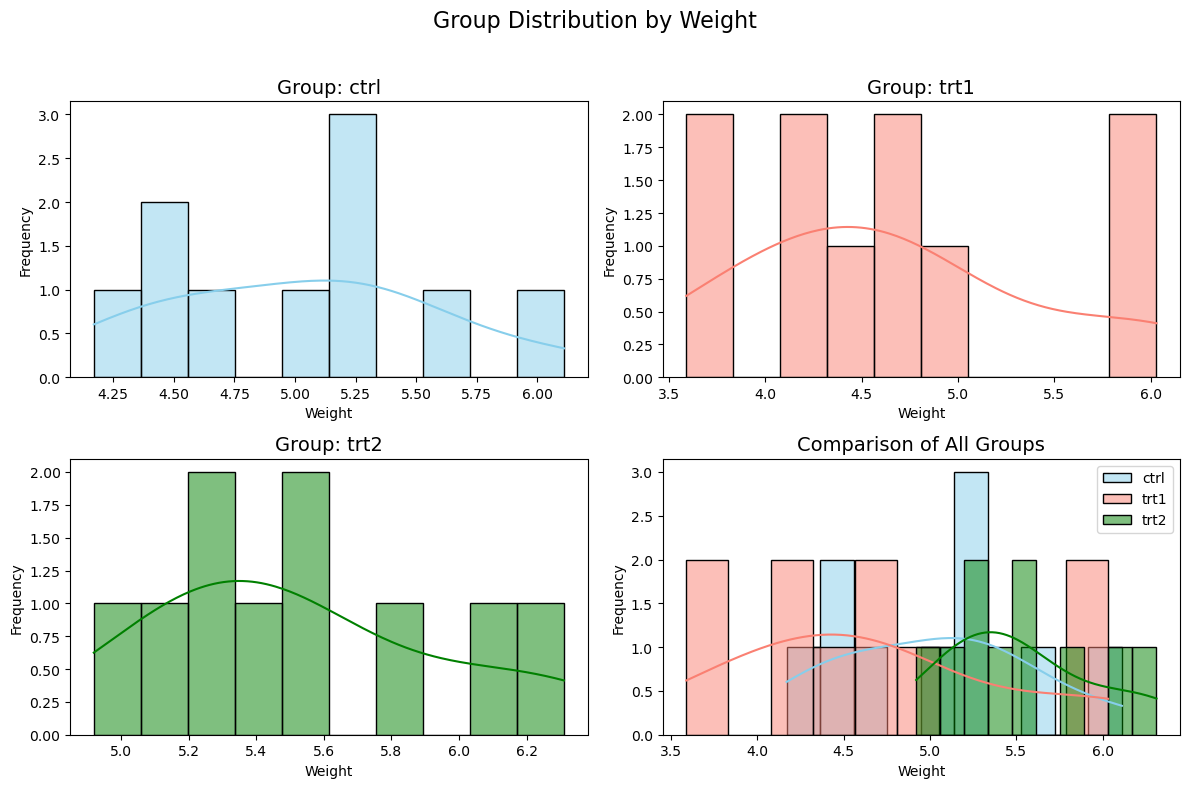

In [17]:
# Set up the figure with 2 rows and 2 columns (4 subplots in total)
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Set the title for the entire figure
plt.suptitle('Group Distribution by Weight', fontsize=16)

# Plot 1: Histogram for the 'ctrl' group
sns.histplot(df[df['group'] == 'ctrl']['weight'], kde=True, color='skyblue', bins=10, ax=axs[0, 0], edgecolor='black')
axs[0, 0].set_title('Group: ctrl', fontsize=14)
axs[0, 0].set_xlabel('Weight')
axs[0, 0].set_ylabel('Frequency')

# Plot 2: Histogram for the 'trt1' group
sns.histplot(df[df['group'] == 'trt1']['weight'], kde=True, color='salmon', bins=10, ax=axs[0, 1], edgecolor='black')
axs[0, 1].set_title('Group: trt1', fontsize=14)
axs[0, 1].set_xlabel('Weight')
axs[0, 1].set_ylabel('Frequency')

# Plot 3: Histogram for the 'trt2' group
sns.histplot(df[df['group'] == 'trt2']['weight'], kde=True, color='green', bins=10, ax=axs[1, 0], edgecolor='black')
axs[1, 0].set_title('Group: trt2', fontsize=14)
axs[1, 0].set_xlabel('Weight')
axs[1, 0].set_ylabel('Frequency')

# Plot 4: Overlapping histograms for all groups
sns.histplot(df[df['group'] == 'ctrl']['weight'], kde=True, color='skyblue', bins=10, ax=axs[1, 1], label='ctrl', edgecolor='black')
sns.histplot(df[df['group'] == 'trt1']['weight'], kde=True, color='salmon', bins=10, ax=axs[1, 1], label='trt1', edgecolor='black')
sns.histplot(df[df['group'] == 'trt2']['weight'], kde=True, color='green', bins=10, ax=axs[1, 1], label='trt2', edgecolor='black')
axs[1, 1].set_title('Comparison of All Groups', fontsize=14)
axs[1, 1].set_xlabel('Weight')
axs[1, 1].set_ylabel('Frequency')
axs[1, 1].legend()  # Add a legend to differentiate the groups

# Adjust the layout to prevent overlapping of elements
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust to leave space for the main title

# Show the plot
plt.show()

In [18]:
ctrl_d = df[df['group'] == 'ctrl']['weight']
trt1_d = df[df['group'] == 'trt1']['weight']
trt2_d = df[df['group'] == 'trt2']['weight']

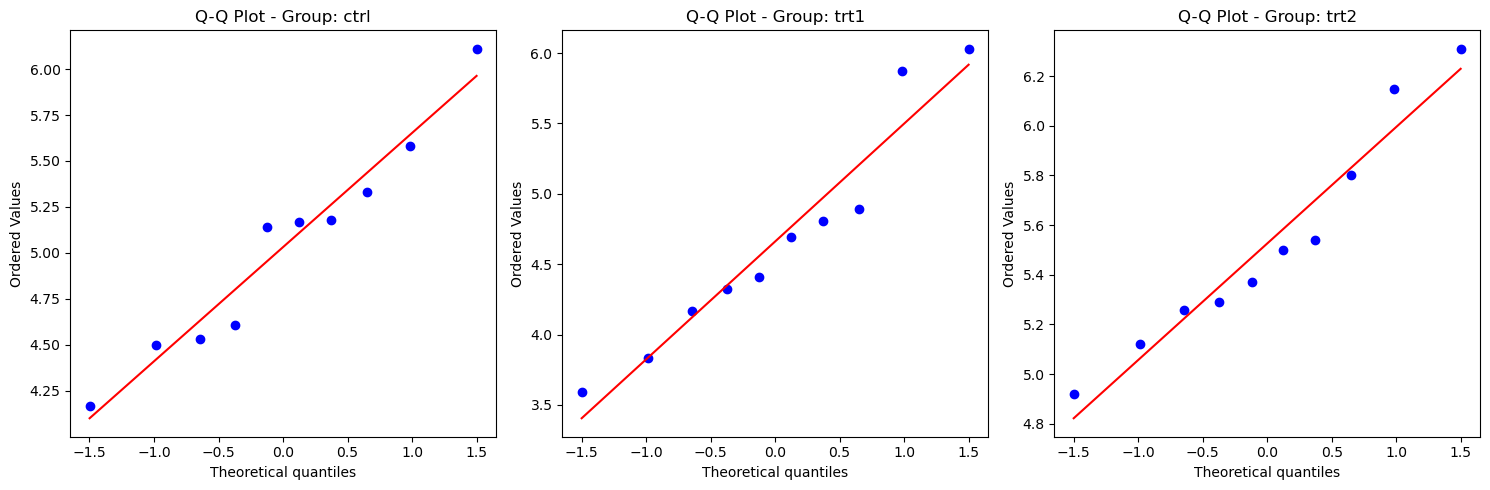

In [19]:
# Set up the figure with 1 row and 3 columns (for each group)
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Create Q-Q plot for 'ctrl' group
stats.probplot(ctrl_d, dist='norm', plot=axs[0])
axs[0].set_title('Q-Q Plot - Group: ctrl')

# Create Q-Q plot for 'trt1' group
stats.probplot(trt1_d, dist='norm', plot=axs[1])
axs[1].set_title('Q-Q Plot - Group: trt1')

# Create Q-Q plot for 'trt2' group
stats.probplot(trt2_d, dist='norm', plot=axs[2])
axs[2].set_title('Q-Q Plot - Group: trt2')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

In [20]:
import pandas as pd
from scipy import stats
from tabulate import tabulate

# Sample DataFrame (replace this with your actual data)
# df = pd.read_csv("your_data.csv")  # example for reading the data

# Define the significance level
alpha = 0.05  # significance level

# Initialize lists to hold the results for both tests
results_shapiro = []
results_ks = []

# Perform the Shapiro-Wilk and Kolmogorov-Smirnov tests for each group
for group_name in ['ctrl', 'trt1', 'trt2']:
    # Filter the DataFrame to get the weight data for each group
    group_data = df[df['group'] == group_name]['weight']
    
    # Perform the Shapiro-Wilk test
    shapiro_stat, p_value_shapiro = stats.shapiro(group_data)
    p_value_shapiro = round(p_value_shapiro, 3)
    result_shapiro = "YES: The data is not normally distributed." if p_value_shapiro < alpha else "NO: The data may be normally distributed."
    results_shapiro.append([group_name, p_value_shapiro, result_shapiro])
    
    # Perform the Kolmogorov-Smirnov test against a normal distribution
    mean = group_data.mean()
    std = group_data.std()
    ks_stat, p_value_ks = stats.kstest(group_data, 'norm', args=(mean, std))
    p_value_ks = round(p_value_ks, 3)
    result_ks = "YES: The data is not normally distributed." if p_value_ks < alpha else "NO: The data may be normally distributed."
    results_ks.append([group_name, p_value_ks, result_ks])

# Use tabulate to format the results for better presentation
headers = ['Group', 'P-value', 'Reject the null hypothesis?']

# Print the results with headers for both tests
print("==== Shapiro-Wilk Test ====")
table_shapiro = tabulate(results_shapiro, headers=headers, tablefmt='pretty')
print(table_shapiro)

print("\n==== Kolmogorov-Smirnov Test ====")
table_ks = tabulate(results_ks, headers=headers, tablefmt='pretty')
print(table_ks)

==== Shapiro-Wilk Test ====
+-------+---------+-------------------------------------------+
| Group | P-value |        Reject the null hypothesis?        |
+-------+---------+-------------------------------------------+
| ctrl  |  0.747  | NO: The data may be normally distributed. |
| trt1  |  0.452  | NO: The data may be normally distributed. |
| trt2  |  0.564  | NO: The data may be normally distributed. |
+-------+---------+-------------------------------------------+

==== Kolmogorov-Smirnov Test ====
+-------+---------+-------------------------------------------+
| Group | P-value |        Reject the null hypothesis?        |
+-------+---------+-------------------------------------------+
| ctrl  |  0.876  | NO: The data may be normally distributed. |
| trt1  |  0.817  | NO: The data may be normally distributed. |
| trt2  |  0.812  | NO: The data may be normally distributed. |
+-------+---------+-------------------------------------------+


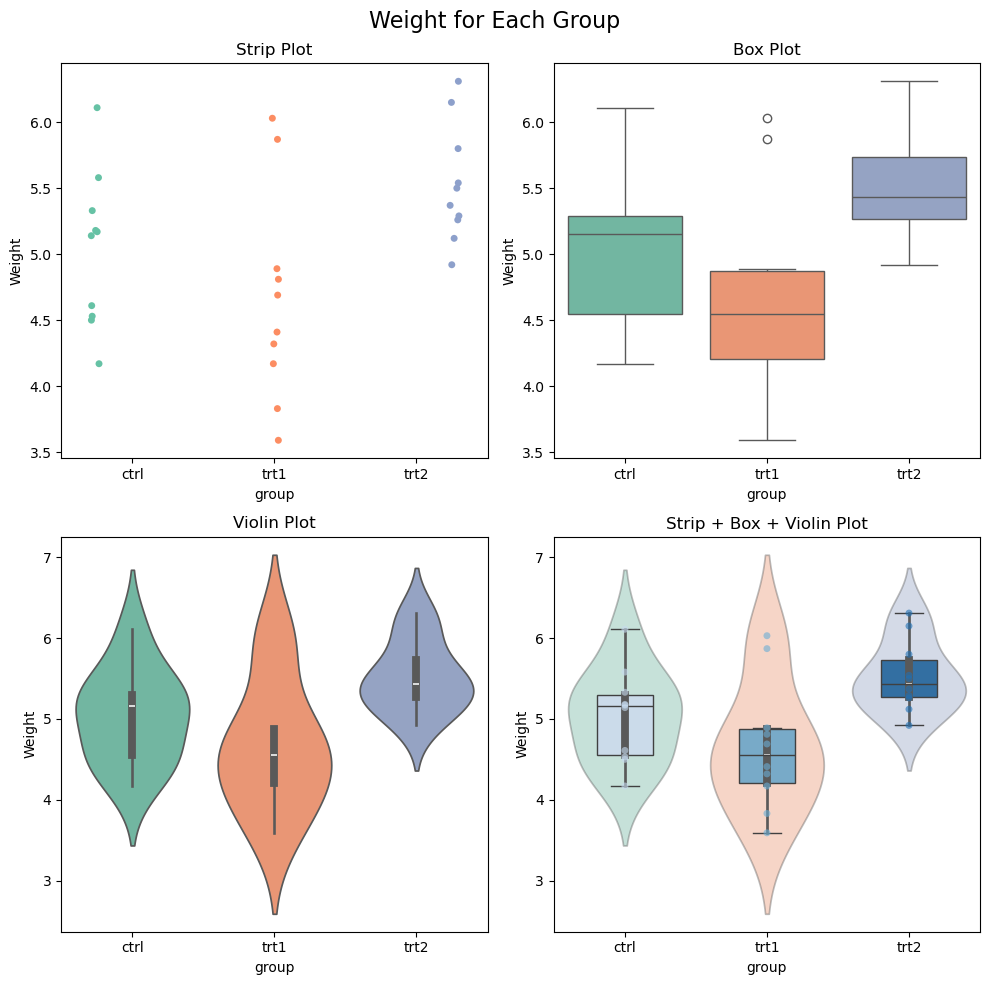

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame and it has the columns 'group' and 'weight'

# Create a 2x2 grid of subplots (2 rows, 2 columns)
fig, axs = plt.subplots(2, 2, figsize=(10, 10))  # Adjusted the size for horizontal layout
plt.suptitle('Weight for Each Group', fontsize=16)  # Adds a title for the whole figure

# Plot 1: Strip plot
sns.stripplot(x='group', y='weight', hue='group', data=df, palette='Set2', jitter=True, ax=axs[0][0], dodge=True)
axs[0][0].set_title('Strip Plot', fontsize=12)
axs[0][0].set_ylabel('Weight', fontsize=10)  # Set y-axis label

# Plot 2: Boxplot
sns.boxplot(x='group', y='weight', hue='group', data=df, palette='Set2', ax=axs[0][1])
axs[0][1].set_title('Box Plot', fontsize=12)
axs[0][1].set_ylabel('Weight', fontsize=10)  # Set y-axis label

# Plot 3: Violin Plot
sns.violinplot(x='group', y='weight', hue='group', data=df, palette='Set2', ax=axs[1][0])
axs[1][0].set_title('Violin Plot', fontsize=12)
axs[1][0].set_ylabel('Weight', fontsize=10)  # Set y-axis label

# Plot 4: Combined Strip, Box and Violin Plot
sns.stripplot(x='group', y='weight', hue='group', data=df, palette='Blues', jitter=False, dodge=False, ax=axs[1][1], alpha=0.6)
sns.boxplot(x='group', y='weight', hue='group', data=df, palette='Blues', ax=axs[1][1], width=0.4, fliersize=0, color='black')  
sns.violinplot(x='group', y='weight', hue='group', data=df, palette='Set2', ax=axs[1][1], alpha=0.4)
axs[1][1].set_title('Strip + Box + Violin Plot', fontsize=12)
axs[1][1].set_ylabel('Weight', fontsize=10)  # Set y-axis label


# Adjust layout to prevent overlap
plt.tight_layout()  
plt.show()


https://www.pythonfordatascience.org/parametric-assumptions-python/

In [22]:
import numpy as np
import scipy.stats as stats

# Assuming 'df' is your DataFrame and contains the column 'group' and 'weight'
# Filter the data for the two groups
trt1_data = df[df['group'] == 'trt1']['weight']
trt2_data = df[df['group'] == 'trt2']['weight']

# Perform Levene's Test for Equal Variances
stat, p_value = stats.levene(trt1_data, trt2_data)

# Output the result of Levene's Test
print("==== Levene's Test for Equal Variances ==== \n")
print(f"statistic: {stat}")
print(f"p-value: {p_value} \n")

# If the p-value is greater than 0.05, we fail to reject the null hypothesis (equal variances)
if p_value > 0.05:
    print("Reject the null hypotesis?")
    print("NO: The data may have equal variances")
else:
    print("Reject the null hypotesis?")
    print("YES: The data may NOT have equal variances")


==== Levene's Test for Equal Variances ==== 

statistic: 2.104177792800407
p-value: 0.1641008315679023 

Reject the null hypotesis?
NO: The data may have equal variances


In [23]:
import numpy as np
import scipy.stats as stats

# Assuming 'df' is your DataFrame and contains the column 'group' and 'weight'
# Filter the data for the two groups
trt1_data = df[df['group'] == 'trt1']['weight']
trt2_data = df[df['group'] == 'trt2']['weight']

# Perform Bartlett's Test for Equal Variances
stat, p_value = stats.bartlett(trt1_data, trt2_data)

# Output the result of Bartlett's Test
print("==== Bartlett's Test for Equal Variances ==== \n")
print(f"statistic: {stat}")
print(f"p-value: {p_value} \n")

# If the p-value is greater than 0.05, we fail to reject the null hypothesis (equal variances)
if p_value > 0.05:
    print("Reject the null hypothesis?")
    print("NO: The data may have equal variances.")
else:
    print("Reject the null hypothesis?")
    print("YES: The data may NOT have equal variances.")

==== Bartlett's Test for Equal Variances ==== 

statistic: 2.7569039873509995
p-value: 0.09683547356000702 

Reject the null hypothesis?
NO: The data may have equal variances.
